# <h1><center>Gift Wonder -- Data Wrangling</center></h1>

### <center>Hio Wa Mak<center>

### <center>01/04/2025<center>

## Import packages

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#check current directory
#os.getcwd()

## Read in the data

In [3]:
# Read in data from a csv file
retail2010 = pd.read_csv('../raw_data/online_retail_2009_2010.csv', encoding='latin1')
retail2011 = pd.read_csv('../raw_data/online_retail_2010_2011.csv', encoding='latin1')

## Examine details about the dataset

In [4]:
#Examine info on this dataset
retail2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [5]:
#Examine info on this dataset
retail2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Joining Data

In [7]:
#Combine the two datasets (2010 and 2011 data)
gift_df = pd.concat([retail2010, retail2011], ignore_index=True)
gift_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


## Codebook

**InvoiceNo:** Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 

**StockCode:** Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 

**Description:** Product (item) name. Nominal. 

**Quantity:** The quantities of each product (item) per transaction. Numeric.

**InvoiceDate:** Invice date and time. Numeric. The day and time when a transaction was generated. 

**UnitPrice:** Unit price. Numeric. Product price per unit in sterling (Â£). 

**CustomerID:** Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 

**Country:** Country name. Nominal. The name of the country where a customer resides.

## The Gift Wonder Dataset

In [8]:
#Number of columns and observations
gift_df.shape

(1067371, 8)

In [9]:
#Look at the first few observations to get an idea
gift_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [10]:
#Rename variable names
gift_df.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)
gift_df.rename(columns={'InvoiceDate': 'InvoiceDateTime'}, inplace=True)
gift_df.rename(columns={'Price': 'UnitPrice'}, inplace=True)

### Examine missing data

#### Number of missing values by variables

In [11]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([gift_df.isnull().sum(), 100 * gift_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
CustomerID,243007,22.766873
Description,4382,0.410541
Invoice,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDateTime,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


There are 23% of missing data in CustomerID. This column is essential for doing customer segmentation. Therefore, I will remove rows with missing CustomerID.

#### Drop rows with missing data

In [12]:
#Drop rows of missing data on CustomerID
missing_CustomerID = gift_df['CustomerID'].isnull()
gift_data = gift_df[~missing_CustomerID]
gift_data.shape

(824364, 8)

In [13]:
#Examine missing data again
missing = pd.concat([gift_data.isnull().sum(), 100 * gift_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Invoice,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDateTime,0,0.0
UnitPrice,0,0.0
CustomerID,0,0.0
Country,0,0.0


There are no more missing data in this dataset.

### Descriptive Statistics

In [14]:
gift_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Invoice          824364 non-null  object 
 1   StockCode        824364 non-null  object 
 2   Description      824364 non-null  object 
 3   Quantity         824364 non-null  int64  
 4   InvoiceDateTime  824364 non-null  object 
 5   UnitPrice        824364 non-null  float64
 6   CustomerID       824364 non-null  float64
 7   Country          824364 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.6+ MB


In [15]:
#Descriptive statistics of numeric variables
gift_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,824364.0,12.414574,188.976099,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,824364.0,3.676800,70.241388,0.0,1.25,1.95,3.75,38970.0
CustomerID,824364.0,15324.638504,1697.464450,12346.0,13975.00,15255.00,16797.00,18287.0


#### Examine rows with negative quantity

In [16]:
neg_quantity = gift_data[gift_data['Quantity'] <= 0]
print(len(neg_quantity))
neg_quantity = neg_quantity.sort_values(by='Quantity', ascending=False)
neg_quantity.head(20)

18744


,Invoice,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
880506,C567902,21794,CLASSIC FRENCH STYLE BASKET NATURAL,-1,9/22/2011 16:29,3.95,15555.0,United Kingdom
399968,C527660,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,10/18/2010 14:23,2.10,15502.0,United Kingdom
399821,C527647,84927A,WAKE UP COCKEREL TILE HOOK,-1,10/18/2010 13:54,2.10,15281.0,United Kingdom
399822,C527647,85067,CREAM SWEETHEART WALL CABINET,-1,10/18/2010 13:54,18.95,15281.0,United Kingdom
399823,C527647,21667,GLASS CAKE COVER AND PLATE,-1,10/18/2010 13:54,16.95,15281.0,United Kingdom
399824,C527647,85030,FRENCH CHATEAU OVAL PLATTER,-1,10/18/2010 13:54,7.95,15281.0,United Kingdom
399827,C527653,22501,PICNIC BASKET WICKER LARGE,-1,10/18/2010 13:57,9.95,15252.0,United Kingdom
399963,C527659,22899,CHILDREN'S APRON DOLLY GIRL,-1,10/18/2010 14:20,2.10,15827.0,United Kingdom
846159,C565075,D,Discount,-1,8/31/2011 17:25,38.39,13408.0,United Kingdom
399969,C527660,17013D,ORIGAMI ROSE INCENSE IN TUBE,-1,10/18/2010 14:23,1.57,15502.0,United Kingdom


In [17]:
#Descriptive statistics of numeric variables
gift_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,824364.0,12.414574,188.976099,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,824364.0,3.676800,70.241388,0.0,1.25,1.95,3.75,38970.0
CustomerID,824364.0,15324.638504,1697.464450,12346.0,13975.00,15255.00,16797.00,18287.0


#### Drop rows with negative quantity

In [18]:
#### Drop rows with negative quantity
negquant = gift_data['Quantity'] <= 0
gift_data = gift_data[~negquant]
gift_data.shape

(805620, 8)

#### Examine rows with zero unit price

In [19]:
zero_price = gift_data[gift_data['UnitPrice'] == 0]
print(len(zero_price))
zero_price.head(20)

71


,Invoice,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,12/2/2009 13:34,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,12/3/2009 11:19,0.0,15658.0,United Kingdom
16107,490727,M,Manual,1,12/7/2009 16:38,0.0,17231.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,12/8/2009 15:25,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,12/8/2009 15:25,0.0,14108.0,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,12/15/2009 13:49,0.0,15070.0,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,12/18/2009 14:22,0.0,18071.0,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,1/6/2010 14:54,0.0,14258.0,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,1/8/2010 10:43,0.0,12417.0,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,1/15/2010 12:43,0.0,16858.0,United Kingdom


#### Drop rows with zero unit price

In [20]:
#### Drop rows with zero unit price
zeroprice = gift_data['UnitPrice'] == 0
gift_data = gift_data[~zeroprice]
gift_data.shape

(805549, 8)

In [21]:
#Descriptive statistics of numeric variables
gift_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,805549.0,13.290522,143.634088,1.000,2.00,5.00,12.00,80995.0
UnitPrice,805549.0,3.206561,29.199173,0.001,1.25,1.95,3.75,10953.5
CustomerID,805549.0,15331.954970,1696.737039,12346.000,13982.00,15271.00,16805.00,18287.0


In [22]:
# Convert CustomerID from float64 to int
gift_data = gift_data.copy()
gift_data['CustomerID'] = gift_data['CustomerID'].astype(int)

In [23]:
# Examine dataset info
gift_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Invoice          805549 non-null  object 
 1   StockCode        805549 non-null  object 
 2   Description      805549 non-null  object 
 3   Quantity         805549 non-null  int64  
 4   InvoiceDateTime  805549 non-null  object 
 5   UnitPrice        805549 non-null  float64
 6   CustomerID       805549 non-null  int32  
 7   Country          805549 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 52.2+ MB


In [24]:
# Look at the first few rows
gift_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085,United Kingdom


In [25]:
# Make a copy of the dataset
giftdata = gift_data.copy()

### Distributions

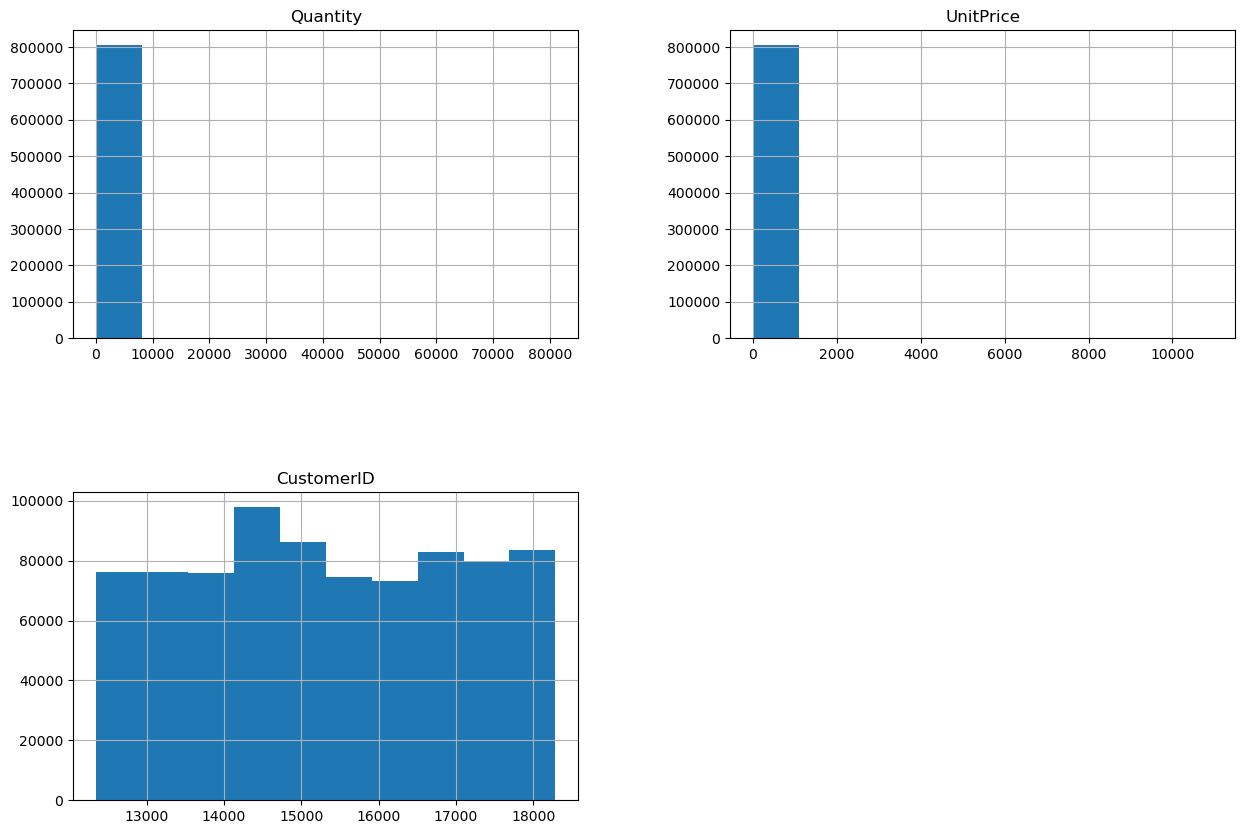

In [26]:
giftdata.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

### Examine outliers

In [27]:
#Quantity outliers
quantoutliers = giftdata[giftdata['Quantity'] > 10000]
quantoutliers = quantoutliers.sort_values(by='Quantity', ascending=False)
quantoutliers.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446,United Kingdom
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2/15/2010 11:57,0.10,13902,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,3/17/2010 13:09,0.10,13902,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,3/17/2010 13:09,0.10,13902,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,3/17/2010 13:09,0.10,13902,Denmark
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,3/17/2010 13:09,0.10,13902,Denmark


In [28]:
#Unit Price outliers
priceoutliers = giftdata[giftdata['UnitPrice'] > 2000]
priceoutliers = priceoutliers.sort_values(by='UnitPrice', ascending=False)
priceoutliers.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
135013,502263,M,Manual,1,3/23/2010 15:22,10953.50,12918,United Kingdom
358639,524159,M,Manual,1,9/27/2010 16:12,10468.80,14063,United Kingdom
74356,496115,M,Manual,1,1/29/2010 11:04,8985.60,17949,United Kingdom
698843,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029,United Kingdom
129903,501766,M,Manual,1,3/19/2010 11:35,6958.17,15760,Norway
129987,501768,M,Manual,1,3/19/2010 11:45,6958.17,15760,Norway
947835,573077,M,Manual,1,10/27/2011 14:13,4161.06,12536,France
947838,573080,M,Manual,1,10/27/2011 14:20,4161.06,12536,France
931867,571751,M,Manual,1,10/19/2011 11:18,3949.32,12744,Singapore
288706,517483,M,Manual,1,7/29/2010 12:29,3610.50,12737,France


Since there is no reason to believe these transactions are invalid or a result of errors, let's keep them in the dataset.

### Creating additional variables for analysis

In [29]:
#Split the InvoiceDate variable into InvoiceDate and InvoiceTime
giftdata[['InvoiceDate', 'InvoiceTime']] = giftdata['InvoiceDateTime'].str.split(' ', expand=True)  # Split into two columns
giftdata['InvoiceDate'] = pd.to_datetime(giftdata['InvoiceDate'], format='%m/%d/%Y')    # Convert 'InvoiceDate' to datetime
giftdata['InvoiceTime'] = pd.to_datetime(giftdata['InvoiceTime'], format='%H:%M').dt.time    # Convert 'Time' to time object

#Drop the InvoiceDate column
giftdata = giftdata.drop(columns=['InvoiceDateTime'])

#Continue to split the InvoiceDate variable into Year, Month, and Day
giftdata['InvoiceYear'] = giftdata['InvoiceDate'].dt.year
giftdata['InvoiceMonth'] = giftdata['InvoiceDate'].dt.month
giftdata['InvoiceDay'] = giftdata['InvoiceDate'].dt.day

print(giftdata)

        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

         UnitPrice  CustomerID         Country InvoiceDate InvoiceTime  \
0            

In [30]:
# Create a new vairable called TotalPrice
giftdata['TotalPrice'] = giftdata['Quantity'] * giftdata['UnitPrice'] 
giftdata.head()

,Invoice,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceTime,InvoiceYear,InvoiceMonth,InvoiceDay,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085,United Kingdom,2009-12-01,07:45:00,2009,12,1,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085,United Kingdom,2009-12-01,07:45:00,2009,12,1,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085,United Kingdom,2009-12-01,07:45:00,2009,12,1,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085,United Kingdom,2009-12-01,07:45:00,2009,12,1,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085,United Kingdom,2009-12-01,07:45:00,2009,12,1,30.0


In [31]:
# Rearrange columns by specifying the desired order
giftdata_clean = giftdata[['Invoice', 'InvoiceDate', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDay', 'InvoiceTime', 'StockCode', 'Description', 'CustomerID', 'UnitPrice', 'Quantity', 'TotalPrice']]

In [32]:
print(giftdata_clean.info())
giftdata_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       805549 non-null  object        
 1   InvoiceDate   805549 non-null  datetime64[ns]
 2   InvoiceYear   805549 non-null  int32         
 3   InvoiceMonth  805549 non-null  int32         
 4   InvoiceDay    805549 non-null  int32         
 5   InvoiceTime   805549 non-null  object        
 6   StockCode     805549 non-null  object        
 7   Description   805549 non-null  object        
 8   CustomerID    805549 non-null  int32         
 9   UnitPrice     805549 non-null  float64       
 10  Quantity      805549 non-null  int64         
 11  TotalPrice    805549 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), object(4)
memory usage: 67.6+ MB
None


,Invoice,InvoiceDate,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceTime,StockCode,Description,CustomerID,UnitPrice,Quantity,TotalPrice
0,489434,2009-12-01,2009,12,1,07:45:00,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,13085,6.95,12,83.4
1,489434,2009-12-01,2009,12,1,07:45:00,79323P,PINK CHERRY LIGHTS,13085,6.75,12,81.0
2,489434,2009-12-01,2009,12,1,07:45:00,79323W,WHITE CHERRY LIGHTS,13085,6.75,12,81.0
3,489434,2009-12-01,2009,12,1,07:45:00,22041,"RECORD FRAME 7"" SINGLE SIZE",13085,2.10,48,100.8
4,489434,2009-12-01,2009,12,1,07:45:00,21232,STRAWBERRY CERAMIC TRINKET BOX,13085,1.25,24,30.0


### Save data as a cleaned dataset

In [33]:
path = 'D:\\Springboard\\Projects\\capstone3\\Gift_Online_Business\\data\\'
giftdata_clean.to_csv(path+'giftdata_cleaned.csv', index=False)

## Summary

&emsp;&emsp;The data originates from an online gift business, referred to here as Gift Wonder (pseudonym). It is publicly available at the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/502/online+retail+ii). This dataset includes all transactions made by a UK-based, non-store online retailer between December 1, 2009, and December 9, 2011. The transactions are contained across two Excel worksheets: one covering the period from December 2009 to December 2010, and the other from December 2010 to December 2011. The retailer specializes in unique gift items for various occasions, with a significant portion of its customers being wholesalers.  <br>

&emsp;&emsp;To prepare the data for analysis, the following data wrangling steps were performed. First, the two worksheets were combined into a single dataset, resulting in a dataset with 8 columns and 1,067,371 observations, where each observation represents a transaction item. Second, rows with missing CustomerID values were removed, reducing the dataset by approximately 23%. Third, rows with negative Quantity values, which appeared to represent invalid transactions, were dropped (n = 18,744). Similarly, rows with zero UnitPrice (n = 71), which do not contribute to revenue, were also removed. Afterward, I reviewed the distribution of variables and identified some outliers. However, these outliers were retained, as there was no evidence suggesting they were invalid. <br>

&emsp;&emsp;Additional variables were created to enhance the dataset for analysis. The InvoiceDateTime variable was broken down into InvoiceYear, InvoiceMonth, InvoiceDay, and InvoiceTime. A new variable, TotalPrice, was computed by multiplying `UnitPrice` with `Quantity`. Finally, the columns were reordered for better organization. <br>

&emsp;&emsp;The cleaned dataset was saved as "giftdata_cleaned.csv" for subsequent analysis. The final dataset contains 11 columns and 805,549 rows.